In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



import os

dirname = '../datasets/UNSW_NB15'
for filename in os.listdir(dirname):
    print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../datasets/UNSW_NB15\NUSW-NB15_features.csv
../datasets/UNSW_NB15\UNSW-NB15_1.csv
../datasets/UNSW_NB15\UNSW-NB15_2.csv
../datasets/UNSW_NB15\UNSW-NB15_3.csv
../datasets/UNSW_NB15\UNSW-NB15_4.csv
../datasets/UNSW_NB15\UNSW-NB15_LIST_EVENTS.csv
../datasets/UNSW_NB15\UNSW_NB15_testing-set.csv
../datasets/UNSW_NB15\UNSW_NB15_training-set.csv


In [2]:
import pandas as pd
import numpy as np
import sys
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, Flatten
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Conv1D,MaxPooling1D, Reshape, GlobalAveragePooling1D
from keras.utils import to_categorical
import sklearn.preprocessing
from sklearn import metrics
from scipy.stats import zscore
from tensorflow.keras.utils import get_file, plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
print(pd.__version__)
print(np.__version__)
print(sys.version)
print(sklearn.__version__)

3.0.0
2.4.1
3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
1.8.0


In [3]:
#Loading training set into dataframe
df = pd.read_csv('../datasets/UNSW_NB15/UNSW_NB15_testing-set.csv')
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
#Loading testing set into dataframe
qp = pd.read_csv('../datasets/UNSW_NB15/UNSW_NB15_training-set.csv')
qp

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [6]:
#Dropping the last columns of training set
df = df.drop('id', axis=1) # we don't need it in this project
df.shape

(175341, 44)

In [7]:
df = df.drop('label', axis=1) # we don't need it in this project
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,Normal


In [9]:
#Dropping the last columns of testing set
qp = qp.drop('id', axis=1)
qp = qp.drop('label', axis=1)
qp.shape

(82332, 43)

In [10]:
df.isnull().values.any()

np.False_

In [11]:
qp.isnull().values.any()

np.False_

In [12]:
#defining col list
cols = ['proto','state','service']
cols

['proto', 'state', 'service']

In [18]:
#One-hot encoding
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(each, axis=1)
    return df

In [19]:
#Merging train and test data
combined_data = pd.concat([df,qp])
combined_data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,1,2,0,0,0,2,1,0,Normal
82328,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,1,0,0,0,3,2,0,Normal
82329,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,Normal
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,Normal


In [20]:
combined_data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,1,2,0,0,0,2,1,0,Normal
82328,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,1,0,0,0,3,2,0,Normal
82329,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,Normal
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,Normal


In [21]:
tmp = combined_data.pop('attack_cat')

In [22]:
#Applying one hot encoding to combined data
combined_data = one_hot(combined_data,cols)

In [23]:
combined_data

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,...,False,False,False,False,False,False,False,False,False,False
1,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,...,False,False,False,False,False,False,False,False,False,False
2,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,...,False,False,False,False,False,False,False,False,False,False
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,True,False,False,False,False,False,False,False,False,False
4,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,False,False,False,False,False,False,False,False,False,False
82328,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,False,False,False,False,False,False,False,False,False,False
82329,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,False,False,False,False,False,False,False,False,False,False
82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,False,False,False,False,False,False,False,False,False,False


In [26]:
#Function to min-max normalize
def normalize(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with normalized specified features
    """
    result = df.copy() # do not touch the original df
    for feature_name in cols:
        if df[feature_name].dtype in ['int64', 'float64']:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            if max_value > min_value:
                result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [27]:
#Normalizing training set
new_train_df = normalize(combined_data,combined_data.columns)
new_train_df

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,2.024634e-03,0.000470,0.000363,0.000016,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,False,False,False,False,False,False,False,False,False,False
1,1.083170e-02,0.001221,0.003449,0.000049,0.002866,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,False,False,False,False,False,False,False,False,False,False
2,2.705215e-02,0.000658,0.001452,0.000024,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,False,False,False,False,False,False,False,False,False,False
3,2.802737e-02,0.001033,0.001089,0.000042,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,True,False,False,False,False,False,False,False,False,False
4,7.490901e-03,0.000845,0.000545,0.000036,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,8.333335e-08,0.000094,0.000000,0.000006,0.000000,0.200000,0.996078,0.000000,1.389445e-02,0.000000,...,False,False,False,False,False,False,False,False,False,False
82328,1.843502e-02,0.001785,0.000726,0.001257,0.000024,0.000024,0.996078,0.992126,2.072552e-05,0.000100,...,False,False,False,False,False,False,False,False,False,False
82329,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,False,False,False,False,False,False,False,False,False,False
82330,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,False,False,False,False,False,False,False,False,False,False


In [28]:
tmp

0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
          ...  
82327    Normal
82328    Normal
82329    Normal
82330    Normal
82331    Normal
Name: attack_cat, Length: 257673, dtype: str

In [29]:
#Appending class column to training set
new_train_df["Class"] = tmp
new_train_df

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,Class
0,2.024634e-03,0.000470,0.000363,0.000016,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,False,False,False,False,False,False,False,False,False,Normal
1,1.083170e-02,0.001221,0.003449,0.000049,0.002866,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,False,False,False,False,False,False,False,False,False,Normal
2,2.705215e-02,0.000658,0.001452,0.000024,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,False,False,False,False,False,False,False,False,False,Normal
3,2.802737e-02,0.001033,0.001089,0.000042,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,False,False,False,False,False,False,False,False,False,Normal
4,7.490901e-03,0.000845,0.000545,0.000036,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,False,False,False,False,False,False,False,False,False,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,8.333335e-08,0.000094,0.000000,0.000006,0.000000,0.200000,0.996078,0.000000,1.389445e-02,0.000000,...,False,False,False,False,False,False,False,False,False,Normal
82328,1.843502e-02,0.001785,0.000726,0.001257,0.000024,0.000024,0.996078,0.992126,2.072552e-05,0.000100,...,False,False,False,False,False,False,False,False,False,Normal
82329,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,False,False,False,False,False,False,False,False,False,Normal
82330,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,False,False,False,False,False,False,False,False,False,Normal


In [30]:
new_train_df.isnull().values.any()

np.False_

In [33]:
y = new_train_df["Class"]
X = new_train_df.drop('Class', axis=1)

In [34]:
y.shape

(257673,)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape

(206138, 196)

In [37]:
combined_data_X = X_train

In [38]:
X_test.shape

(51535, 196)

In [39]:
# y_train=new_train_df["Class"]
y_train

9459      Exploits
147134     Generic
33634       Normal
110206      Normal
5991       Fuzzers
            ...   
119879     Generic
103694    Exploits
131932     Generic
146867     Generic
121958     Generic
Name: Class, Length: 206138, dtype: str

In [40]:
y_train.isnull().values.any()

np.False_

In [41]:
# combined_data_X = new_train_df.drop('Class', 1)
# combined_data_X

In [42]:
oos_pred = []

In [44]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

In [45]:
kfold = StratifiedKFold(n_splits=2,shuffle=True,random_state=42)
kfold.get_n_splits(combined_data_X,y_train)

2

In [46]:
batch_size = 32
model = Sequential()
model.add(Conv1D(64, kernel_size=64, padding="same",activation="relu",input_shape=(196, 1)))
model.add(MaxPooling1D(pool_size=(10)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Reshape((128, 1), input_shape = (128, )))
model.add(MaxPooling1D(pool_size=(10)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(128, return_sequences=False)))
# model.add(Reshape((128, 1), input_shape = (128, )))
model.add(Dropout(0.6))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\reshape.py:38: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
for layer in model.layers:
    print(layer.output_shape)

AttributeError: 'Conv1D' object has no attribute 'output_shape'

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 196, 64)        │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 19, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 128, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 12, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 1)          │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,158 (805.30 KB)

 Trainable params: 206,028 (804.80 KB)

 Non-trainable params: 130 (520.00 B)

In [50]:
for train_index, test_index in kfold.split(combined_data_X,y_train):
    train_X, test_X = combined_data_X.iloc[train_index], combined_data_X.iloc[test_index]
    train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]

    print("train index:",train_index)
    print("test index:",test_index)
    print(train_y.value_counts())

    train_X_over,train_y_over= oversample.fit_resample(train_X, train_y)
    print(train_y_over.value_counts())

    all_classes = np.sort(y_train.unique())

    x_columns_train = new_train_df.columns.drop('Class')
    x_train_array = train_X[x_columns_train].to_numpy(dtype=np.float32)
    x_train_1 = x_train_array.reshape(x_train_array.shape[0], x_train_array.shape[1], 1)

    dummies = pd.get_dummies(train_y_over) # Classification
    outcomes = dummies.columns
    num_classes = len(outcomes)
    y_train_1 = (pd.get_dummies(train_y)
                 .reindex(columns=all_classes, fill_value=0)
                 .to_numpy(dtype=np.float32))

    x_columns_test = new_train_df.columns.drop('Class')
    x_test_array = test_X[x_columns_train].to_numpy(dtype=np.float32)
    x_test_2 = x_test_array.reshape(x_test_array.shape[0], x_test_array.shape[1], 1)

    dummies_test = pd.get_dummies(test_y) # Classification
    outcomes_test = dummies_test.columns
    num_classes = len(outcomes_test)
    y_test_2 = (pd.get_dummies(test_y)
                .reindex(columns=all_classes, fill_value=0)
                .to_numpy(dtype=np.float32))


    model.fit(x_train_1, y_train_1,validation_data=(x_test_2,y_test_2), epochs=9)

    pred = model.predict(x_test_2)
    pred = np.argmax(pred,axis=1)
    y_eval = np.argmax(y_test_2,axis=1)
    score = metrics.accuracy_score(y_eval, pred)
    oos_pred.append(score)
    print("Validation score: {}".format(score))

train index: [     1      2      5 ... 206132 206133 206135]
test index: [     0      3      4 ... 206134 206136 206137]
Class
Normal            37194
Generic           23667
Exploits          17722
Fuzzers            9707
DoS                6531
Reconnaissance     5567
Analysis           1079
Backdoor            931
Shellcode           601
Worms                70
Name: count, dtype: int64
Class
Normal            37194
Worms             37194
Generic           23667
Exploits          17722
Fuzzers            9707
DoS                6531
Reconnaissance     5567
Analysis           1079
Backdoor            931
Shellcode           601
Name: count, dtype: int64
Epoch 1/9
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 58s 17ms/step - accuracy: 0.7322 - loss: 0.7006 - val_accuracy: 0.7490 - val_loss: 0.6185
Epoch 2/9
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 56s 17ms/step - accuracy: 0.7615 - loss: 0.5983 - val_accuracy: 0.7590 - val_loss: 0.5702
Epoch 3/9
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 55s 17ms/step - accuracy: 0.7729

In [51]:
X_test.shape

(51535, 196)

In [53]:
x_test_array = X_test[x_columns_train].to_numpy(dtype=np.float32)
x_test_1 = x_test_array.reshape(x_test_array.shape[0], x_test_array.shape[1], 1)

pred = model.predict(x_test_1)
pred = np.argmax(pred,axis=1)
dummies_test = pd.get_dummies(y_test) # Classification
outcomes_test = dummies_test.columns
num_classes = len(outcomes_test)
Y_test = dummies_test.values


1611/1611 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step


In [54]:
y_eval = np.argmax(Y_test,axis=1)

In [55]:
oos_pred

[0.8007063229487043, 0.807284440520428]

In [56]:
y_test.value_counts()

Class
Normal            18613
Generic           11537
Exploits           9080
Fuzzers            4831
DoS                3292
Reconnaissance     2852
Analysis            519
Backdoor            468
Shellcode           309
Worms                34
Name: count, dtype: int64

In [57]:
dummies_test.columns

Index(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'],
      dtype='str')

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confussion_matrix=confusion_matrix(y_eval, pred, labels=[0, 1, 2, 3, 4, 5,6, 7, 8, 9])

In [60]:
confussion_matrix

array([[   15,     0,     2,   407,     0,     0,    95,     0,     0,
            0],
       [    0,     5,     2,   424,     3,     0,     6,    27,     1,
            0],
       [    0,    10,    61,  3063,    34,     9,    48,    58,     9,
            0],
       [    0,     7,    32,  8304,   123,     1,   242,   353,    18,
            0],
       [    0,     0,     2,   652,  2001,     0,  2023,   151,     2,
            0],
       [    0,     0,    19,   245,    22, 11227,    16,     6,     1,
            1],
       [    0,     0,     2,   196,   527,     1, 17686,   192,     9,
            0],
       [    0,     0,     1,   587,    13,     1,    55,  2195,     0,
            0],
       [    0,     0,     0,    66,     9,     0,    42,    90,   102,
            0],
       [    0,     0,     0,    29,     0,     0,     0,     1,     0,
            4]])

In [61]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

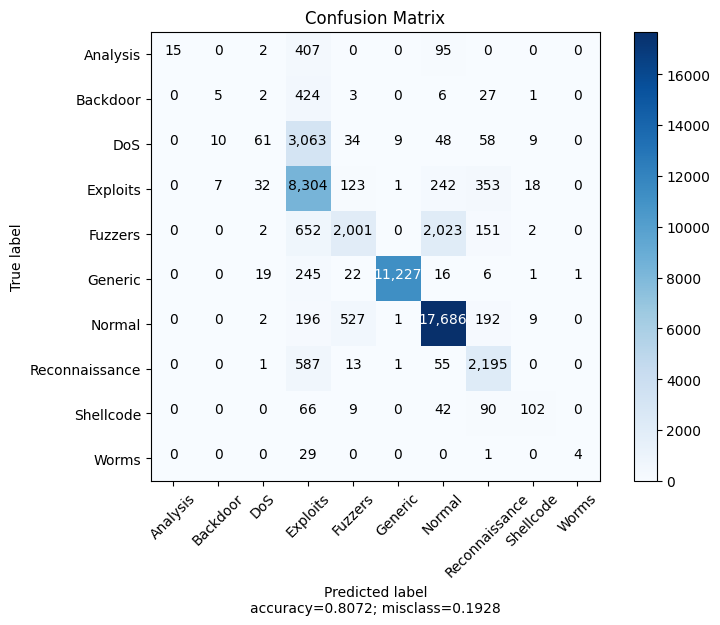

In [62]:
plot_confusion_matrix(cm           = confussion_matrix,
                      normalize    = False,
                      target_names = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms'],
                      title        = "Confusion Matrix")

In [63]:
num_classes = confussion_matrix.shape[0]
metrics = []

for i in range(num_classes):
    TP = confussion_matrix[i, i]
    FN = np.sum(confussion_matrix[i, :]) - TP
    FP = np.sum(confussion_matrix[:, i]) - TP
    TN = np.sum(confussion_matrix) - (TP + FP + FN)

    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    DR = TP / (TP + FP)
    ACC = (TP + TN) / np.sum(confussion_matrix)
    F1 = 2 * (DR * TPR) / (DR + TPR)

    metrics.append({
        'Class': i,
        'TPR': TPR,
        'FPR': FPR,
        'DR': DR,
        'ACC': ACC,
        'F1': F1
    })

# Calculate average metrics
avg_tpr = np.mean([metric['TPR'] for metric in metrics])
avg_fpr = np.mean([metric['FPR'] for metric in metrics])
avg_dr = np.mean([metric['DR'] for metric in metrics])
avg_acc = np.mean([metric['ACC'] for metric in metrics])
avg_f1 = np.mean([metric['F1'] for metric in metrics])

# Print average metrics
print(f"Average TPR: {avg_tpr:.4f}")
print(f"Average FPR: {avg_fpr:.4f}")
print(f"Average DR: {avg_dr:.4f}")
print(f"Average ACC: {avg_acc:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")

Average TPR: 0.4528
Average FPR: 0.0247
Average DR: 0.7165
Average ACC: 0.9614
Average F1 Score: 0.4657


In [64]:
target_class=[]
target_class=["Analysis","Backdoor","DoS", "Exploits", "Fuzzers", "Generic","Normal","Reconnaissance", "Shellcode", "Worms"]

In [66]:
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

In [67]:
pred1 = model.predict(x_test_2)

3221/3221 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step


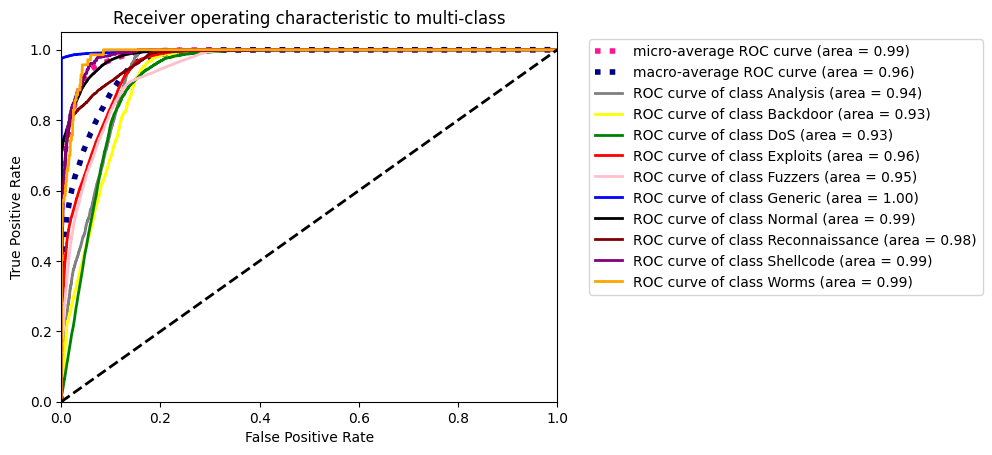

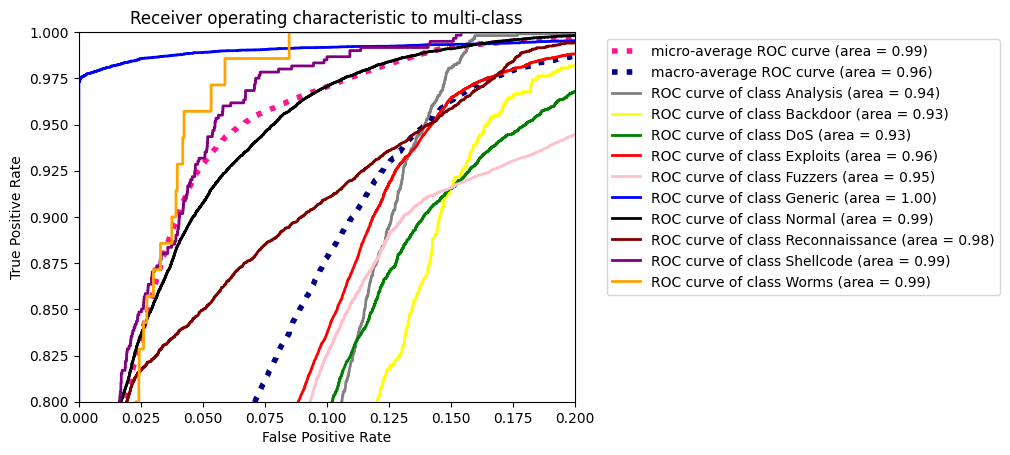

In [68]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_2[:, i], pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_2.ravel(), pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(10)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(10):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 10

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['grey', 'yellow', 'green','red','pink','blue','black','maroon','purple','orange'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(target_class[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

#zoom in the plot
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['grey', 'yellow', 'green','red','pink','blue','black','maroon','purple','orange'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(target_class[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()